In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [2]:
cyto_assay = pd.read_csv('../data/train_data/cyto_assay_clean.csv')
cyp2c19 = pd.read_pickle(".././data/cyp_datasets/cyp2c19.pkl")
cyp2c19_128 = pd.read_pickle(".././data/cyp_datasets/cyp2c19_128.pkl")
cyp2c19_512 = pd.read_pickle(".././data/cyp_datasets/cyp2c19_128.pkl")
cyp2c9 = pd.read_pickle(".././data/cyp_datasets/cyp2c9.pkl")
cyp1a2 = pd.read_pickle(".././data/cyp_datasets/cyp1a2.pkl")
cyp2d6 = pd.read_pickle(".././data/cyp_datasets/cyp2d6.pkl")
cyp3a4 = pd.read_pickle(".././data/cyp3a4.pkl")


In [3]:
cyto_assay.head()

,Unnamed: 0,index,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Inhibition Observed,...,Activity at 11.43 uM,Activity at 25.56 uM,Activity at 57.14 uM,Activity at 0.00164 uM,Activity at 0.00366 uM,Activity at 0.00818 uM,Compound QC,Panel ID,Panel Name,Panel Target
0,0,0,1,842238,6602638.0,0,NaN,NaN,NaN,1,...,8.1486,NaN,-15.6281,NaN,NaN,NaN,QC'd by DPISMR,1,0,NP_000760.1
1,1,1,2,842238,6602638.0,2,NaN,NaN,NaN,1,...,-8.5062,NaN,-37.6308,NaN,NaN,NaN,QC'd by DPISMR,2,2,NP_001020332.1
2,2,2,3,842238,6602638.0,0,NaN,NaN,NaN,1,...,0.4027,NaN,-2.2935,NaN,-1.3363,NaN,QC'd by DPISMR,3,4,NP_059488.2
3,3,3,4,842238,6602638.0,0,NaN,NaN,NaN,1,...,-7.3920,NaN,-11.9048,NaN,NaN,NaN,QC'd by DPISMR,4,3,NP_000752.2
4,4,4,5,842238,6602638.0,2,NaN,NaN,NaN,1,...,-41.7035,NaN,-10.7694,NaN,NaN,NaN,QC'd by DPISMR,5,1,NP_000762.2


In [4]:
cyto_assay.isnull().sum()

Unnamed: 0                       0
index                            0
PUBCHEM_RESULT_TAG               0
PUBCHEM_SID                      0
PUBCHEM_CID                    110
PUBCHEM_ACTIVITY_OUTCOME         0
PUBCHEM_ACTIVITY_SCORE       85715
PUBCHEM_ACTIVITY_URL         85715
PUBCHEM_ASSAYDATA_COMMENT    85715
Inhibition Observed              0
Approved Drug                    0
Collection                   80145
Analysis Comment             85715
Activity Score                   0
Potency                      45031
Curve_Description            42460
Fit_LogAC50                  42606
Fit_HillSlope                42606
Fit_R2                       42606
Fit_InfiniteActivity         42606
Fit_ZeroActivity             42606
Fit_CurveClass                   0
Excluded_Points              42606
Max_Response                     0
Activity at 0.0007 uM        58389
Activity at 0.00160 uM       73752
Activity at 0.00368 uM       20779
Activity at 0.00820 uM       73638
Activity at 0.018 uM

In [5]:
cyto_assay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85715 entries, 0 to 85714
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 85715 non-null  int64  
 1   index                      85715 non-null  int64  
 2   PUBCHEM_RESULT_TAG         85715 non-null  int64  
 3   PUBCHEM_SID                85715 non-null  int64  
 4   PUBCHEM_CID                85605 non-null  float64
 5   PUBCHEM_ACTIVITY_OUTCOME   85715 non-null  int64  
 6   PUBCHEM_ACTIVITY_SCORE     0 non-null      float64
 7   PUBCHEM_ACTIVITY_URL       0 non-null      float64
 8   PUBCHEM_ASSAYDATA_COMMENT  0 non-null      float64
 9   Inhibition Observed        85715 non-null  int64  
 10  Approved Drug              85715 non-null  object 
 11  Collection                 5570 non-null   object 
 12  Analysis Comment           0 non-null      float64
 13  Activity Score             85715 non-null  int

In [6]:
# cyto_assay_corr = (cyto_assay.corr()[['Inhibition Observed']].sort_values(by='Inhibition Observed', ascending=False))
# cyto_assay_corr

In [7]:
features = cyto_assay.select_dtypes(include=['float64','int64'])

X = features
y = 'Inhibition Observed'

In [8]:
cyto_assay['Approved Drug'] = cyto_assay['Approved Drug'].replace({'Biodiverse':'1', 'Exploratory':'0'}).astype(float)

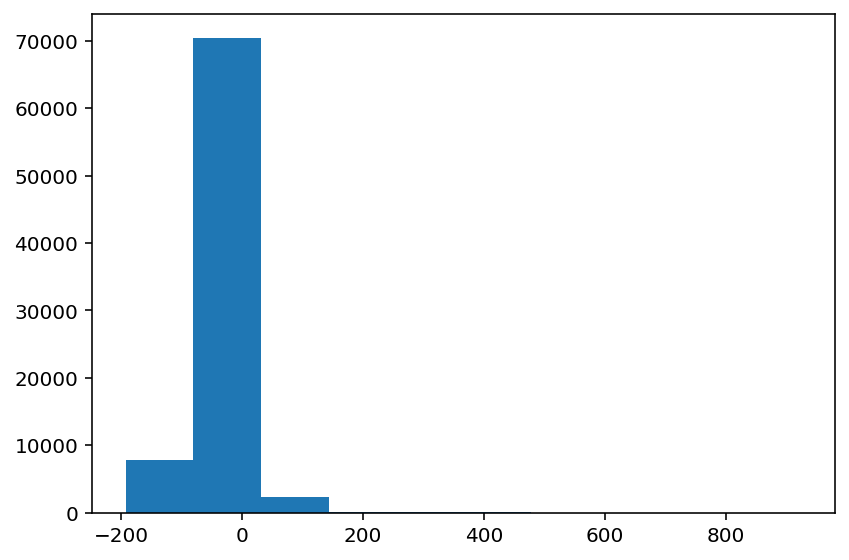

In [9]:
plt.hist(cyto_assay['Activity at 11.43 uM'])
plt.tight_layout();

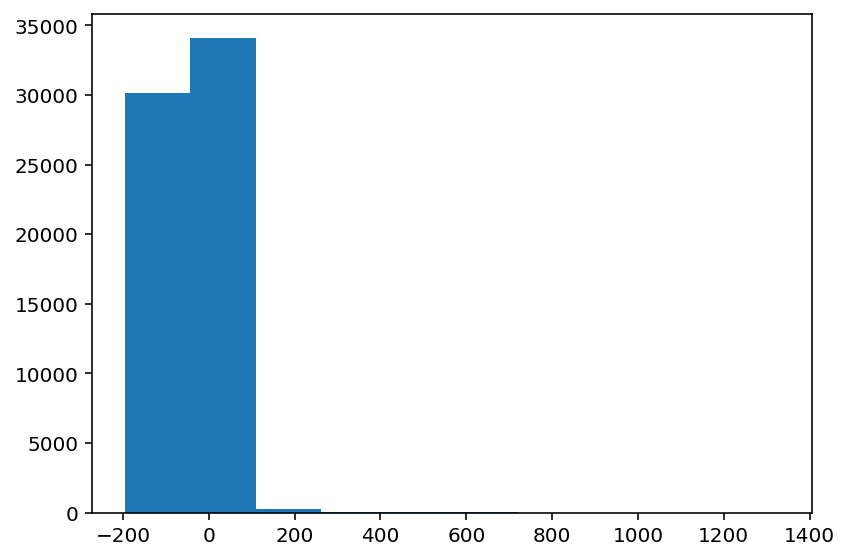

In [10]:
plt.hist(cyto_assay['Activity at 57.14 uM'])
plt.tight_layout();

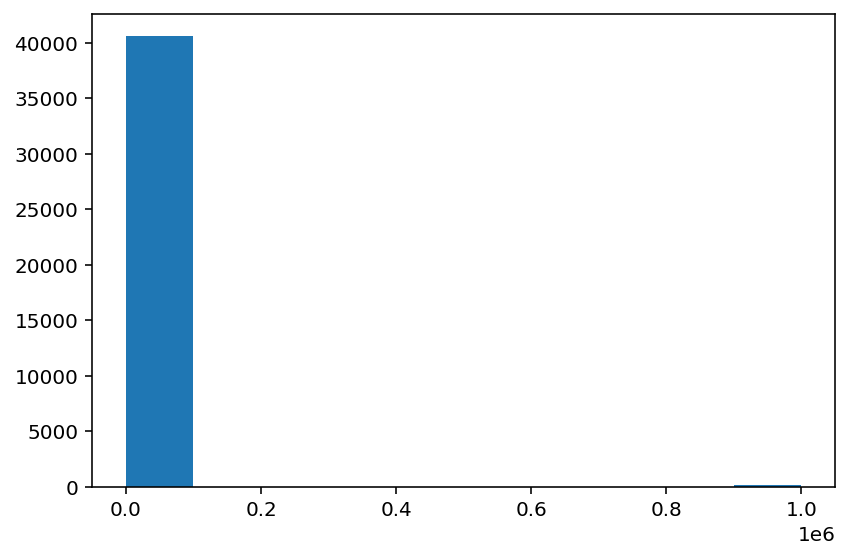

In [11]:
plt.hist(cyto_assay['Potency'])
plt.tight_layout();

## Feature Importance

In [22]:
def feat_importance(data):
    print(__doc__)
    
    data.dropna()

    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    # print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.figure(figsize = (12,20))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    return plt.show();

Automatically created module for IPython interactive environment
1. feature 27 (0.019803)
2. feature 24 (0.018827)
3. feature 31 (0.018697)
4. feature 25 (0.018495)
5. feature 26 (0.018481)
6. feature 53 (0.018419)
7. feature 12 (0.018268)
8. feature 32 (0.018268)
9. feature 29 (0.018254)
10. feature 13 (0.018230)
11. feature 8 (0.018089)
12. feature 28 (0.017849)
13. feature 63 (0.017802)
14. feature 1 (0.017699)
15. feature 14 (0.017683)
16. feature 40 (0.017600)
17. feature 21 (0.017498)
18. feature 6 (0.017428)
19. feature 37 (0.017394)
20. feature 11 (0.017391)
21. feature 46 (0.017279)
22. feature 3 (0.017205)
23. feature 45 (0.017189)
24. feature 44 (0.017180)
25. feature 48 (0.017173)
26. feature 54 (0.017107)
27. feature 50 (0.017098)
28. feature 15 (0.017065)
29. feature 34 (0.017039)
30. feature 51 (0.016985)
31. feature 19 (0.016945)
32. feature 35 (0.016866)
33. feature 42 (0.016818)
34. feature 56 (0.016808)
35. feature 20 (0.016801)
36. feature 5 (0.016723)
37. feature 4

<Figure size 432x288 with 0 Axes>

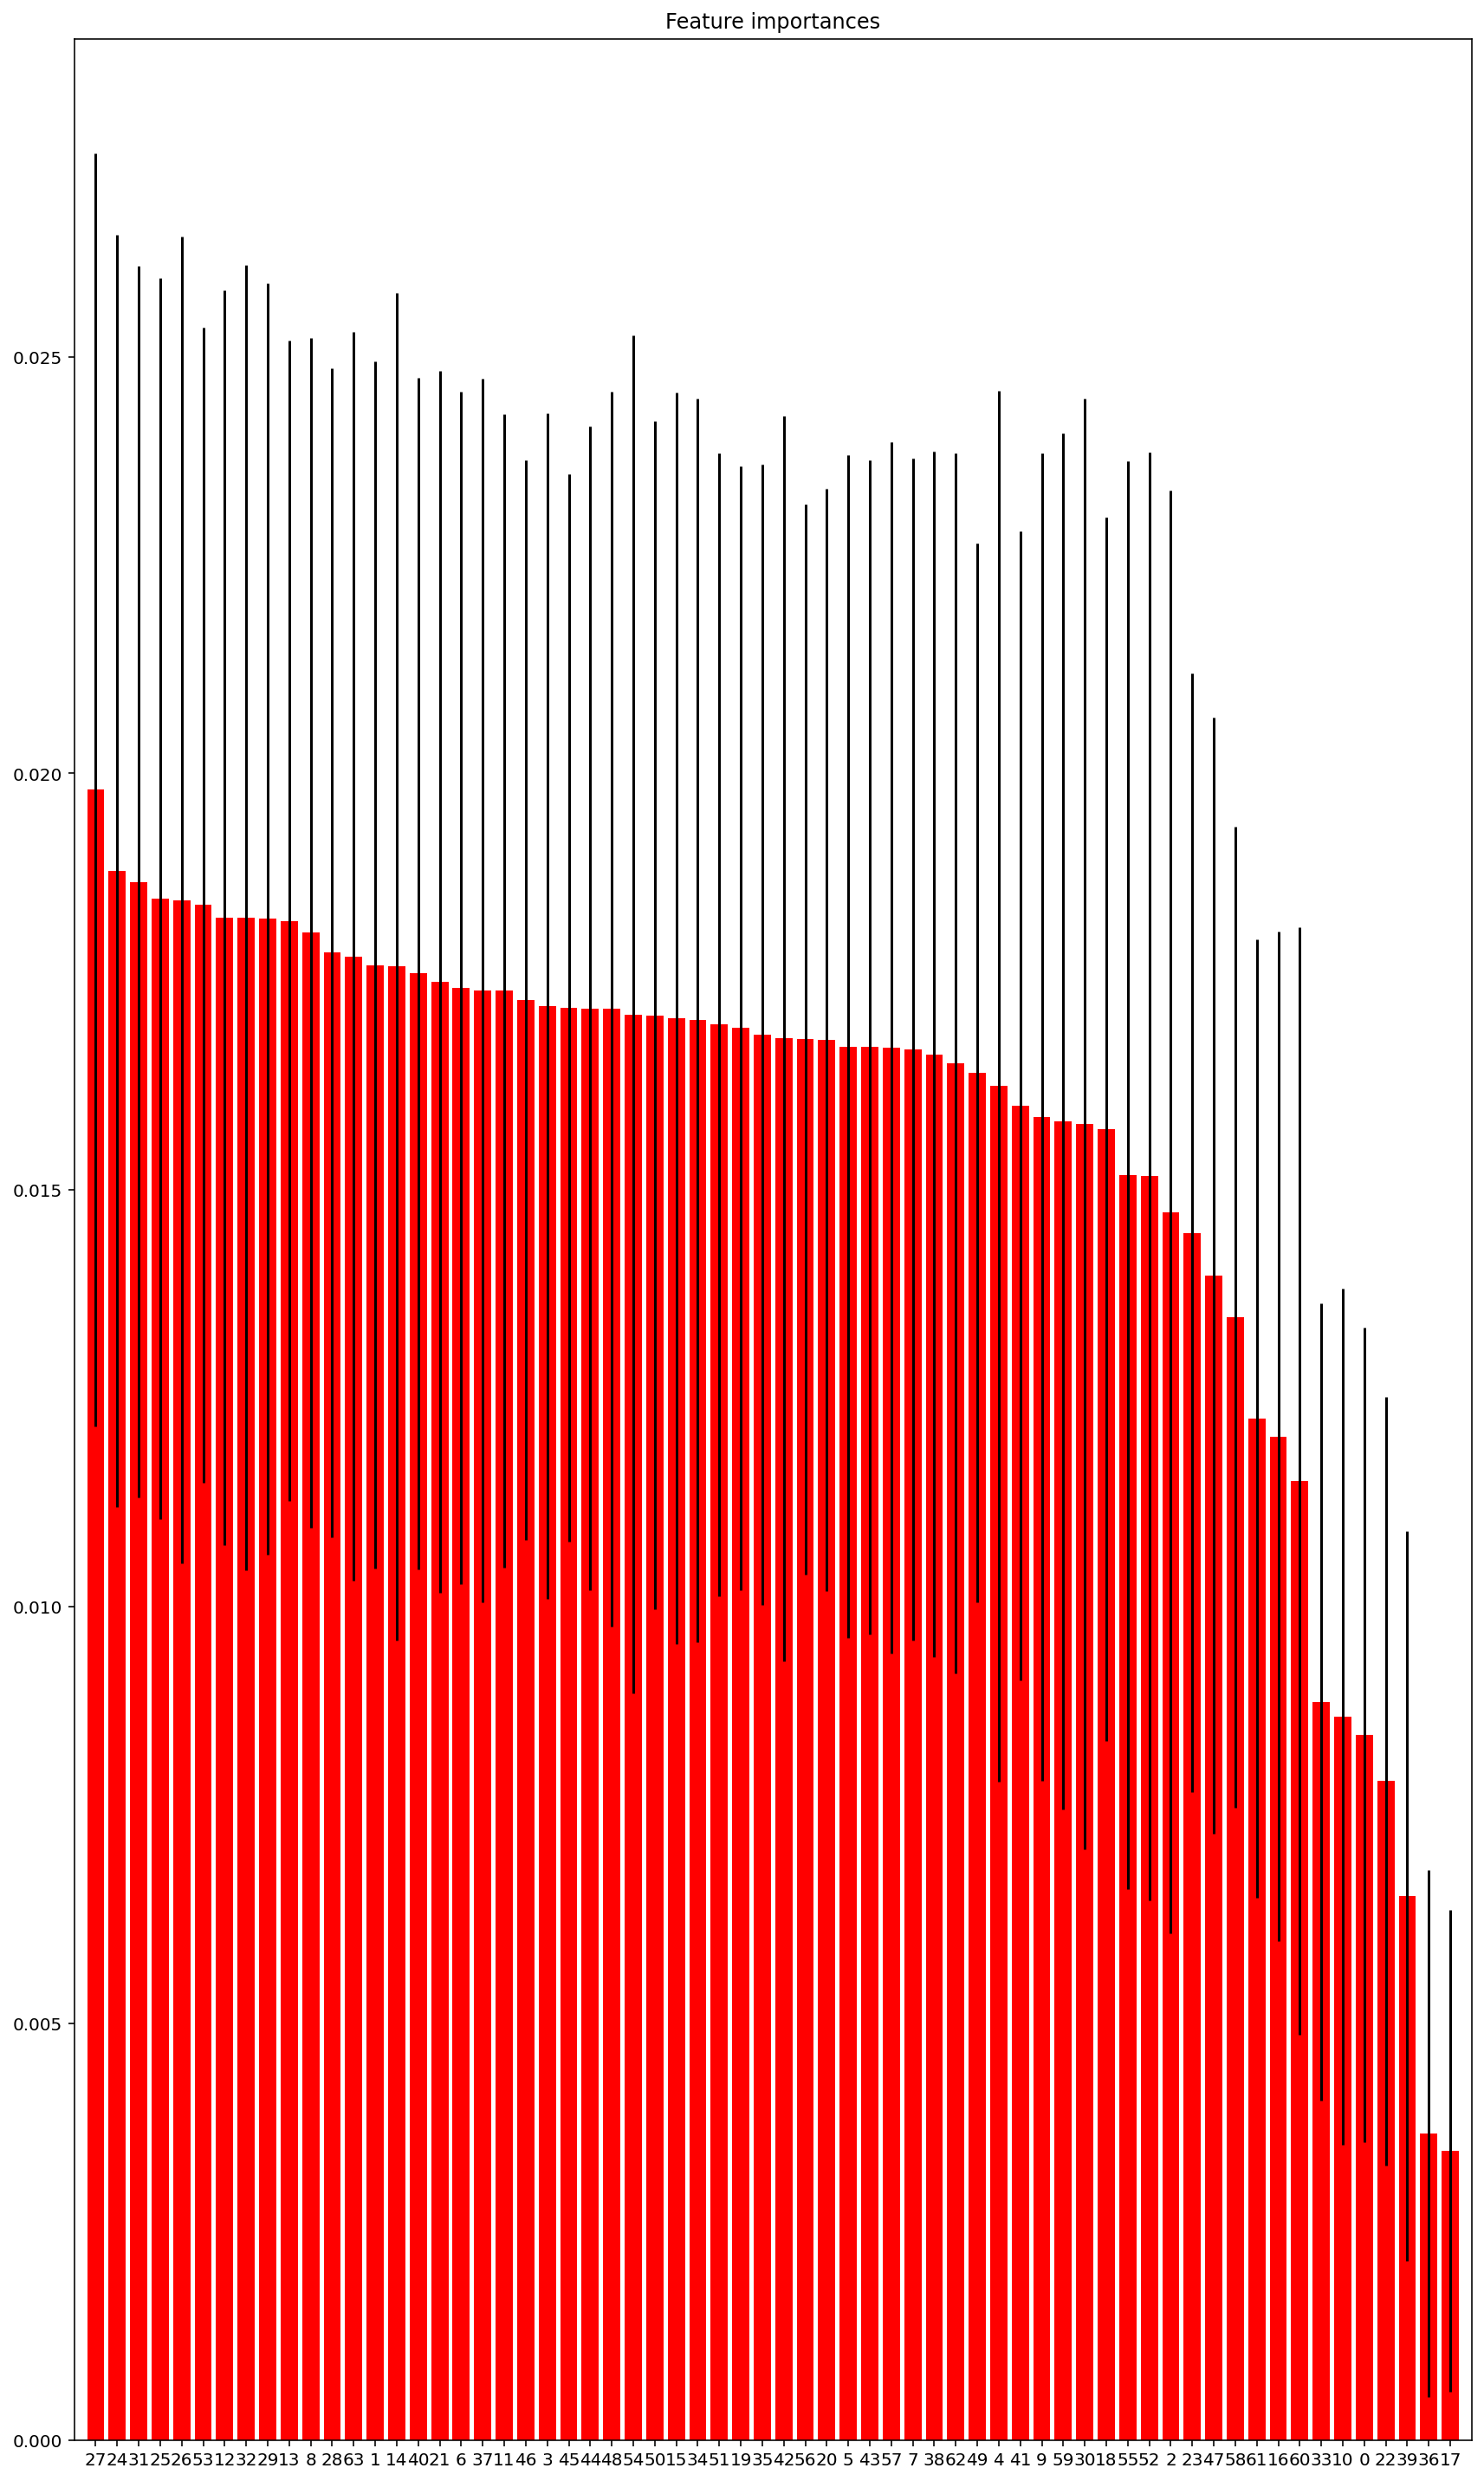

In [24]:
X = cyp2c19.drop(columns=['index', 'PUBCHEM_ACTIVITY_OUTCOME', 'Inhibition Observed'], axis=1)
y = cyp2c19['Inhibition Observed']

cyp2c19_feat_imp = feat_importance(cyp2c19)
cyp2c19_feat_imp.save